In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:

df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df=df.fillna(df.mean())

In [8]:
mms=MinMaxScaler()
mms.fit(df)
df2=mms.transform(df)

In [9]:
df2=pd.DataFrame(df2)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
...,...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303,0.476636
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667,0.246106
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606,0.333333
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091,0.607477


In [12]:
Y =df2.iloc[:,10].values
X=df2.iloc[:,:9].values
X

array([[0.66666667, 1.        , 0.58264463, ..., 0.20779221, 0.28208745,
        0.562217  ],
       [0.48333333, 0.        , 0.14876033, ..., 0.62337662, 0.14104372,
        0.22243673],
       [0.88333333, 1.        , 0.51652893, ..., 0.24675325, 0.28208745,
        0.49657763],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.27272727, 0.24964739,
        0.30503001],
       [0.28333333, 0.        , 0.49586777, ..., 0.25974026, 0.39351199,
        0.65702552],
       [0.28333333, 0.        , 0.0661157 , ..., 0.97402597, 0.14104372,
        0.46930394]])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression

modeln =LinearRegression()
modeln.fit(x_train,y_train)
df2.drop(6,inplace=True)
y_pred=modeln.predict(x_test)


In [27]:
model = Sequential()
n=9 #No. of inputs
model.add(Dense(32, activation='relu', input_shape=(n,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu')) # Last Stage : should be the number of the output

model.compile(optimizer='sgd',loss='mse',metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
x_train.shape

(353, 9)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
trained=model.fit(x_train,y_train,epochs=500,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1726 - mse: 0.1726 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mse: 0.0438 -

In [40]:
trained2=model2.fit(x_train,y_train,epochs=500,batch_size=32,validation_data=[x_test,y_test],verbose=1)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.028

In [38]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f" Error:{mse}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 Error:0.026102330389577287


In [ ]:
y_pred2 = model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f" Error:{mse}")


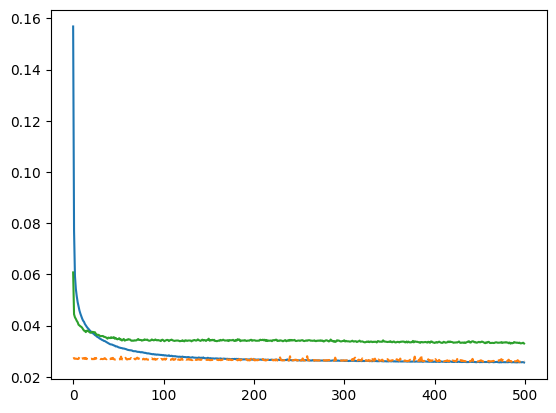

In [46]:
plt.plot(trained.history['mse'])
validation_curve=trained.history['val_mse']
plt.plot(trained2.history['mse'], '--')
plt.plot(validation_curve)